1.1 Загрузка библиотек и данных

In [152]:
import pandas as pd
import numpy as np
import random
import pickle

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2


import warnings
warnings.filterwarnings('ignore')

In [153]:
%matplotlib inline
%config InlineBackend.figure_format ='svg'

In [154]:
matplotlib.rcParams.update({'font.size' : 14})

In [155]:
TRAIN_DATA_PATH = "train.csv"
TEST_DATA_PATH = "test.csv"

In [156]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
train_data.sample(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2659,13194,37,1.0,37.419615,21.609690,9.0,9,12.0,1967,0.178917,B,B,18,3594,4,192.0,1,5,B,183301.877176
7092,6848,75,3.0,60.160707,45.557936,5.0,3,9.0,1967,0.122090,B,B,29,6566,7,1894.0,4,0,B,267785.625570
1815,10853,9,3.0,74.457164,44.034393,10.0,10,17.0,1994,0.069753,B,B,53,13670,4,NaN,1,11,B,328387.800563
7511,6898,27,1.0,42.003396,40.340576,1.0,15,17.0,2016,0.011654,B,B,4,915,0,NaN,0,0,B,111073.150003
241,2741,113,3.0,63.044441,45.877303,5.0,11,9.0,1966,0.050756,B,B,24,5469,1,145.0,0,1,B,227828.011291
6152,6415,22,1.0,33.184628,22.377444,5.0,6,9.0,1966,0.000995,B,B,42,7651,1,NaN,1,5,B,152657.131003
5526,13042,102,3.0,93.438980,95.489516,10.0,4,3.0,2017,0.238617,B,B,26,3889,6,705.0,3,6,B,172374.774676
5976,9729,138,3.0,64.107194,47.844973,7.0,3,12.0,1972,0.000000,B,B,36,6714,2,2672.0,0,2,B,86299.055837
2394,3305,8,1.0,38.022067,23.472027,7.0,12,17.0,2008,0.092291,B,B,21,4346,2,165.0,1,2,B,181726.763986
1476,1775,101,1.0,23.583220,18.442768,3.0,3,5.0,1968,0.225825,A,B,41,6558,7,1548.0,3,2,B,108232.647619


In [157]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

1.2 Функции

In [158]:
def evaluate_preds(train_true_values, train_pred_values, test_pred_values, test_rtue_values):
    print("train R2;\t" + str(round(r2(train_true_values,train_pred_values),3)))
    print("train R2;\t" + str(round(r2(train_true_values,train_pred_values),3)))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y= train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

1.3 Условные обозначения:

   Описание датасета
   Id            - идетификационный номер квартиры
   DistrictId    - идентификационный номер района
   Rooms         - количество комнат
   Square        - площадь
   LifeSquare    - жилая площадь
   KitchenSquare - площадь кухни
   Floor         - этаж
   HouseFloor    - количество этажей в доме
   HouseYear     - год постройки дома
   Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
   Social_1, Social_2, Social_3 - социальные показатели местности
   Healthcare_1, Helthcare_2    - обеспеченность здравоохранением
   Shops_1, Shops_2 - показатели наличия магазинов и торговых центров в местности
   Price           - цена       


In [159]:
test_data = pd.read_csv(TEST_DATA_PATH)
test_data.sample(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4582,14577,45,2.0,36.667517,23.527179,6.0,4,9.0,1971,0.195781,B,B,23,5212,6,NaN,3,2,B
4200,10295,27,1.0,48.165963,NaN,1.0,5,17.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
3409,14421,37,3.0,61.678065,45.480698,5.0,7,9.0,1975,0.127812,B,B,28,7287,5,320.0,1,3,B
1368,3852,58,1.0,49.906410,1.873834,1.0,6,1.0,2018,0.437885,B,B,23,5735,3,1084.0,0,5,B
3864,9278,61,2.0,51.128277,34.339563,6.0,9,12.0,1975,0.300323,B,B,52,10311,6,NaN,1,9,B
2569,3139,104,3.0,72.156094,46.912779,9.0,3,9.0,1983,0.327018,B,B,12,2270,23,2500.0,1,0,B
542,117,59,4.0,121.225250,122.180548,1.0,21,1.0,2016,0.000000,B,B,18,3374,5,620.0,1,2,B
934,5418,62,2.0,74.473629,NaN,1.0,10,17.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
463,12708,3,1.0,36.027518,22.967618,7.0,11,12.0,1975,0.050900,B,B,43,10621,1,30.0,2,3,B
1256,14410,167,2.0,57.906996,35.625637,6.0,8,6.0,1941,0.050272,B,B,21,4231,14,1020.0,0,3,B


1.4 Приведениe


In [160]:
train_data.Id = train_data.Id.astype(str)
train_data.DistrictId = train_data.DistrictId.astype(str)

2.1 EDA

Исправление выбросов 
Заполнение отсутвующих данных

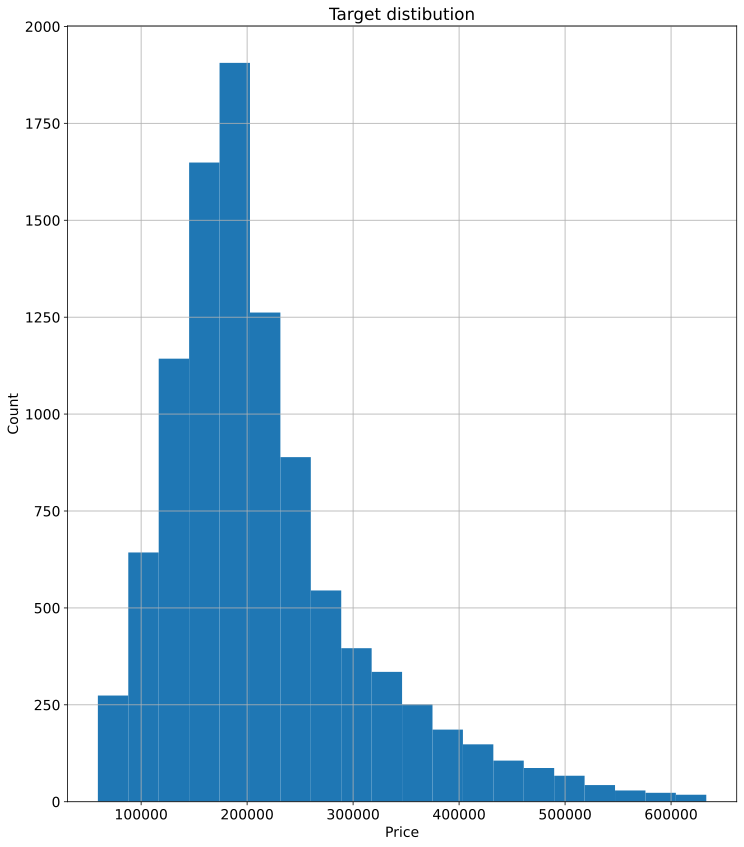

In [161]:
plt.figure(figsize =(12,14))

train_data['Price'].hist(bins=20)

plt.ylabel('Count')           
plt.xlabel('Price')
           
plt.title('Target distibution')
plt.show()

In [162]:
train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


2.2 Обработка выбросов

In [163]:
train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [164]:
train_data['Rooms_outlier'] = 0

train_data.loc[(train_data['Rooms'] == 0) | (train_data['Rooms'] >= 6),'Rooms__outlier'] = 1
train_data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier,Rooms__outlier
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,33,7976,5,NaN,0,11,B,184966.930730,0,NaN
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,46,10309,1,240.0,1,16,B,300009.450063,0,NaN
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,34,7759,0,229.0,1,3,B,220925.908524,0,NaN
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,23,5735,3,1084.0,0,5,B,175616.227217,0,NaN
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,35,5776,1,2078.0,2,4,B,150226.531644,0,NaN
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,...,35,7715,4,990.0,0,6,B,215898.447742,0,NaN
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,...,20,4386,14,NaN,1,5,B,296021.204377,0,NaN
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,...,6,1437,3,NaN,0,2,B,221244.156664,0,NaN
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,...,1,264,0,NaN,0,1,B,229102.795999,0,NaN
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,...,6,1437,3,NaN,0,2,B,95380.220993,0,NaN


KitchenSquare

In [165]:
train_data['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
32.0         2
41.0         2
51.0         2
30.0         2
112.0        2
37.0         2
43.0         2
25.0         2
58.0         2
84.0         1
75.0         1
21.0         1
54.0         1
62.0         1
40.0         1
29.0         1
1970.0       1
27.0         1
39.0         1
35.0         1
23.0         1
73.0         1
31.0         1
60.0         1
63.0         1
42.0         1
36.0         1
96.0         1
26.0         1
53.0         1
78.0         1
66.0         1
2014.0       1
48.0         1
72.0         1
123.0        1
Name: KitchenSquare, dtype: int64

In [166]:
train_data['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [167]:
train_data['KitchenSquare'].quantile(0.975), train_data['KitchenSquare'].quantile(0.025)

(13.0, 0.0)

In [168]:
condition = (train_data['KitchenSquare'].isna()) | \
                (train_data['KitchenSquare'] > train_data['KitchenSquare'].quantile(0.975))
train_data.loc[condition,'KitchenSquare'] = train_data['KitchenSquare'].median()              
train_data.loc[train_data['KitchenSquare'] < 3, 'KitchenSquare'] = 3 

In [169]:
train_data['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

<AxesSubplot:xlabel='KitchenSquare'>

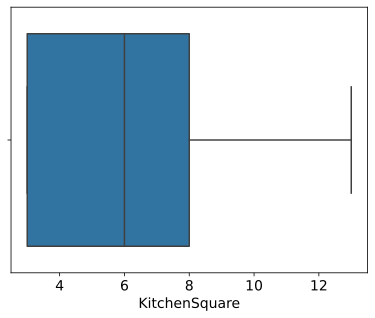

In [170]:
sns.boxplot(train_data.KitchenSquare)

Flore и HouseFlore

In [171]:
train_data.loc[: ,['Floor', 'HouseFloor']].describe()

,Floor,HouseFloor
count,10000.000000,10000.000000
mean,8.526700,12.609400
std,5.241148,6.775974
min,1.000000,0.000000
25%,4.000000,9.000000
50%,7.000000,13.000000
75%,12.000000,17.000000
max,42.000000,117.000000


In [172]:
(train_data['Floor'] > train_data['HouseFloor']).sum()

1825

In [173]:
train_data.loc['HouseFloor_outlier'] = 0
train_data.loc[train_data['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
train_data.loc[train_data['Floor'] > train_data['Floor'], 'HouseFloor_outlier'] = 1


In [174]:
train_data.loc[train_data['HouseFloor'] == 0, 'HouseFloor'] = train_data['HouseFloor'].median()


In [175]:
floor_outliers = train_data.loc[train_data['Floor'] > train_data['HouseFloor']].index
floor_outliers

Index([   7,   14,   16,   21,   26,   35,   39,   44,   51,   67,
       ...
       9959, 9962, 9971, 9973, 9975, 9984, 9985, 9989, 9991, 9995],
      dtype='object', length=1610)

In [176]:
train_data.loc[floor_outliers, 'Floor'] = train_data.loc[floor_outliers, 'HouseFloor']  \
                                                    .apply(lambda x: random.randint(1, x))

In [177]:
(train_data['Floor'] > train_data['HouseFloor']).sum()

0

HouseYear

In [178]:
train_data.HouseYear.unique()

array([    1969,     1978,     1968,     1977,     1976,     2011,
           1960,     2014,     1973,     1959,     1999,     1980,
           1979,     1983,     2001,     2012,     2002,     1996,
           1964,     2018,     1972,     1965,     1984,     1961,
           1971,     1963,     2017,     1970,     1981,     2003,
           2016,     1991,     1975,     2006,     2009,     1985,
           1974,     1994,     2000,     1987,     1998,     2005,
           1990,     1982,     1997,     2015,     2008,     2010,
           2004,     2007,     1967,     1957,     1962,     1993,
           1966,     1955,     1937,     1992,     1954,     1995,
           2019,     1948,     1986,     2013,     1989,     1958,
           1938,     1956,     1988,     2020,     1951,     1952,
           1935,     1914,     1932,     1950,     1917,     1918,
           1940, 20052011,     1942,     1939,     1934,     1931,
           1919,     1912,     1953,     1936,     1947,     1

In [179]:
train_data.loc[train_data['HouseYear'] > 2023, 'HouseYear'] = 2023

Обработка пропусов

In [180]:
train_data.isna().sum()

Id                       0
DistrictId               0
Rooms                    0
Square                   0
LifeSquare            2113
KitchenSquare            0
Floor                    0
HouseFloor               0
HouseYear                0
Ecology_1                0
Ecology_2                0
Ecology_3                0
Social_1                 0
Social_2                 0
Social_3                 0
Healthcare_1          4798
Helthcare_2              0
Shops_1                  0
Shops_2                  0
Price                    0
Rooms_outlier            0
Rooms__outlier        9988
HouseFloor_outlier    9731
dtype: int64

In [181]:
train_data[['Square', 'LifeSquare', 'KitchenSquare' ]].head(10)
          

,Square,LifeSquare,KitchenSquare
0,47.981561,29.442751,6.0
1,65.683640,40.049543,8.0
2,44.947953,29.197612,3.0
3,53.352981,52.731512,9.0
4,39.649192,23.776169,7.0
5,80.384479,46.683720,12.0
6,62.254114,37.160377,7.0
7,80.312926,NaN,3.0
8,64.511437,NaN,3.0
9,46.461409,18.915552,8.0


In [182]:
train_data['LifeSquare_nan'] = train_data['LifeSquare'].isna() *1
coundition = (train_data['LifeSquare'].isna()) \
                 &(~train_data['LifeSquare'].isna()) \
                 &(~train_data['KitchenSquare'].isna())

train_data.loc[coundition, 'LifeSquare'] = train_data.loc[coundition, 'Square'] \
                                                    - train_data.loc[coundition, 'KitchenSquare'] - 3

Проверка

In [187]:
target_name = 'Price'

In [188]:
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x = train_data.drop(columns=target_name)
y = train_data[target_name]

In [190]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, shuffle=True, random_state)

SyntaxError: positional argument follows keyword argument (30465009.py, line 1)

In [191]:
y_train_preds = rf_model.predict(x_train)
y_test_preds = rf_model.predict(x_valid)

NameError: name 'rf_model' is not defined